# Μέρος Α) UCI dataset 
Σοφία Μπαρκάτσα (el18204), Σμαραγδή Μπενέτου (el18048), Μαργαρίτα Τσαρμποπούλου (el18848)

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report
# φέρνουμε τις γνωστές μας κλάσεις για preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

In [102]:
random.seed(1) #για σταθερά αποτελέσματα σε κάθε εκτελεση του Notebook

### Εισαγωγή του dataset από το αρχείο text στο notebook

In [103]:
df = pd.read_csv('/content/drive/MyDrive/Σχολή/neural_networks/ionosphere.txt', delimiter=',', header=None)
#τυπώνουμε τις 5 πρώτες γραμμές και κολόνες
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


## Μελέτη του Dataset

### Σύντομη παρουσίαση
Τα δεδομένα του Dataset προέρχονται από μετρήσεις με ραντάρ που συλλέχθηκαν από το Goose Bay στην περιοχή Λαμπραντόρ. Το σύστημα που χρησιμοποιήθηκε για τις μετρήσεις αποτελειται από μια συστοιχία φάσεων με 16 κεραίες υψήλης συχνότητας και συνολική μεταδιδόμενη ισχύ στα 6.4 kW. Στόχος ήταν ο εντοπισμός ελεύθερων ηλεκτρονίων στην ιονόσφαιρα, με αποτέλεσμα καλές (Good) να θεωρούνται οι μετρήσεις που υποδεικνύουν την παρουσία κάποιου είδους δομής στην ιονόσφαιρα. Από την άλλη, ως κακή ("bad") θεωρούμε μία μέτρηση που δεν εντόπισε οποιαδήποτε δομή, με αποτέλεσμα το σήμα να διαπερνά την ιονόσφαιρα.

Το λαμβανόμενο σήμα υπέστη επεξεργασία χρησιμοποιώντας μια συνάρτηση αυτοσυσχέτησης, που δέχεται ως όρισμα τον χρόνο ενός παλμού και τον αριθμό του και επιστρέφει μια μιγαδική τιμή. Δεδομένου ότι χρησιμοποιήθηκαν 17 διαφορετικοί παλμοί και ότι ο κάθε παλμός περιγράφεται με 2 τιμές (= 1 μιγαδικός αριθμός) καταλήγουμε να έχουμε 34 διαφορετικά attributes για κάθε δείγμα.
Το dataset αποτελείται

### Εισαγωγή dataset και χαρακτηριστικά αυτού
- Δεν χρειάστηκε να γίνει οποιαδήποτε μετατροπή του .txt αρχείου για την εισαγωγή του dataset.

- Με βάση την παραπάνω περιγραφή είναι εμφανές ότι το dataset έχει 34 χαρακτηριστικά, τα οποία είναι όλα αριθμοί, αφού περιγράφουν μιγαδικές τιμές.

- Ο αριθμός δειγμάτων ανέρχεται στα 351

- Η τελευταία στήλη (35η) είναι το αποτέλεσμα της μέτρησης που παίρνει τιμές {g,b}, ανάλογα με το αν είχαμε καλή ή κακή ένδειξη. Στο σημείο αυτό κάναμε μετατροπή της κλάσης g σε 1 και της b σε 0.

- Δεν υπάρχουν οποιεσδήποτε άλλες τιμές, όπως αριθμηση γραμμών, στήλων ή επικεφαλίδες. Επίσης δεν υπάρχουν απουσιάζουσες τιμές, κάτι που δηλώνεται ρητά στην περιγραφή του dataset.

- Τέλος δεν υπάρχει κάποια ταξινόμηση στην σειρά με την οποία μας δίνονται τα δεδομένα, δηλαδή τα καλά αποτελέσματα (g) και τα κακά (b) είναι ανακατεμένα.


In [104]:
#Μετατροπή της κλάσης g σε 1 και της b σε 0.
df = df.replace('g', 1)
df = df.replace('b', 0)

# μετατροπή του dataframe σε numpy array
data = df.to_numpy()

# Στον πίνακα X αποθηκεύουμε τα attributes
X = data[0:data.shape[0], 0:data.shape[1] - 1]
# Στον Y αποθηκεύουμε την κλάση του εκάστοτε δείγματος
y = data[0:data.shape[0], -1]

### Ελέγχουμε αν οι κλάσεις είναι ισορροπημένες

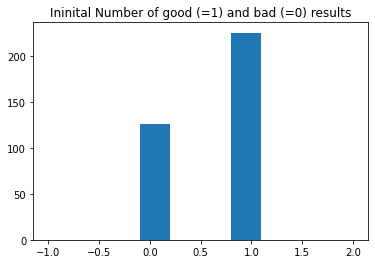

In [105]:
plt.hist(y, range=(-1, 2), align='mid')     # classes are unbalanced
plt.title("Ininital Number of good (=1) and bad (=0) results")
plt.show()

Είναι εμφανές ότι τα καλά αποτελέσματα (g ή αλλιως 1) είναι αρκέτα περισσότερα από τα αρνητικά (b ή 0), με αποτέλεσμα οι κλάσεις να μην είναι ισορροπημένες.

## Προετοιμασία Dataset
Έχοντας ήδη μετατρέψει τις κλάσεις good σε 1 και bad σε 0, μένει μόνο να χωρίσουμε το Dataset σε train set και test set με ποσοστό 30% των δειγμάτων στο test set.

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Ταξινόμηση
Αξιολόγηση διαφόρων ταξινομητών out of the box, με όλες τις παραμέτρους σε default τιμές. Ως μετρικές θα χρησιμοποιήσουμε την ορθότητα (accuracy), και το F1-score.

Επίσης για κάθε εκτιμητή θα υπολογίσουμε το cross validation score, δηλαδή την απόδοση του εκτιμητή, όπως αυτή προκύπτει χρησιμοποιώντας 10-fold cross-validation. Για τον σκοπό αυτόν κατασκευάσαμε μια γενική συνάρτηση evaluate_classifier που, έχοντας ως είσοδο έναν εκτιμητή, υπολογίζει την απόδοση αυτού για κάθε ένα από τα 10 folds και επιστρέφει την μέση τιμή των αποδόσεων αυτών.

In [107]:
def evaluate_classifier(clf, X, y, folds=10):
    # using classifier clf, we get 10 different scores,
    # by using 10 fold cross validation
    scores = cross_val_score(clf, X, y, cv=10, n_jobs = 1)
    return np.mean(scores)

#### 1) Dummy Classifier

In [108]:
dummyclf = DummyClassifier()
dummyclf.fit(X_train, y_train)
dummyclf_accuracy = metrics.accuracy_score(y_test, dummyclf.predict(X_test))
dummyclf_f1_score = metrics.f1_score(y_test, dummyclf.predict(X_test))
dummyclf_cross_val_score = evaluate_classifier(dummyclf, X_train, y_train)

#### 2) Gaussian Naive Bayes (GNB)

In [189]:
gaussianNBclf = GaussianNB()
gaussianNBclf.fit(X_train, y_train)
gaussianNBclf_accuracy = metrics.accuracy_score(y_test, gaussianNBclf.predict(X_test))
gaussianNBclf_f1_score = metrics.f1_score(y_test, gaussianNBclf.predict(X_test))
gaussianNB_cross_val_score = evaluate_classifier(gaussianNBclf, X_train, y_train)

0.8962264150943396 0.9308176100628931


#### 3) KNeirestNeighbors (kNN)

In [110]:
neighborsclf = KNeighborsClassifier()
neighborsclf.fit(X_train, y_train)
neighborsclf_accuracy = metrics.accuracy_score(y_test, neighborsclf.predict(X_test))
neighborsclf_f1_score = metrics.f1_score(y_test, neighborsclf.predict(X_test))
neighborsclf_cross_val_score = evaluate_classifier(neighborsclf, X_train, y_train)

#### 4) Logistic Regression (LR)

In [111]:
logisticRegressorclf = LogisticRegression()
logisticRegressorclf.fit(X_train, y_train)
logisticRegressorclf_accuracy = metrics.accuracy_score(y_test, logisticRegressorclf.predict(X_test))
logisticRegressorclf_f1_score = metrics.f1_score(y_test, logisticRegressorclf.predict(X_test))
logisticRegressorclf_cross_val_score = evaluate_classifier(logisticRegressorclf, X_train, y_train)

### Αποτελέσματα της Ορθότητας (Accuracy) των Classifiers

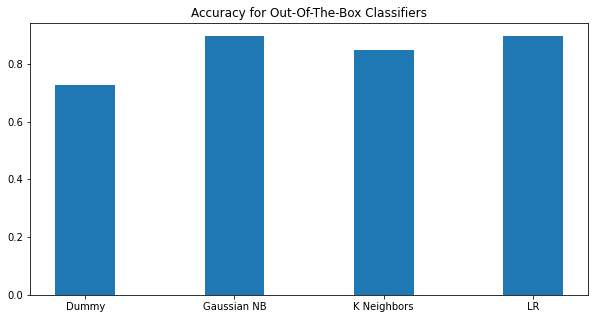

Dummy : 72.64150943396226%
Gaussian NB : 89.62264150943396%
K Neighbors : 84.90566037735849%
LR : 89.62264150943396%


In [112]:
results_accuracy = {'Dummy':dummyclf_accuracy, 'Gaussian NB': gaussianNBclf_accuracy,
                    'K Neighbors': neighborsclf_accuracy, 'LR':logisticRegressorclf_accuracy}

plt.figure(figsize=(10, 5))
plt.bar(list(results_accuracy.keys()), list(results_accuracy.values()), width = 0.4)
plt.title("Accuracy for Out-Of-The-Box Classifiers")
plt.show()

for k in results_accuracy.keys():
  print(f"{k} : {results_accuracy[k]*100}%")

Βλέπουμε ότι την καλύτερη απόδοση την έχουν ο GNB και ο LR, με ποσοστό επιτυχίας 89%.  και ο KNN με 85%. Στην τελευταία θέση, έχοντας σημαντική διαφορά με τους υπόλοιπους ταξινομητές, βρίσκεται φυσικά ο Dummy, με μόλις 72% επιτυχία. Τα αποτελέσματα των τριών πρώτων ταξινομητών είναι αρκετά κοντά μεταξύ τους, τόσο που δεδομένης της στοχαστικότητας της διαδικασίας εκπαίδευσης, τα αποτελέσματα διαφέρουν αν κανείς ξανατρέξει τον κώδικα. Μάλιστα, σε προηγούμενο διαχωρισμό των δεδομένων σε Train set και dataset, ο RL φαινόταν να έχει τα καλύτερα αποτελέσματα μεταξύ των ταξινομητών. Πάντα όμως η διαφορά στην απόδοση των RL, GNB και KNN είναι το πολύ της τάξης του 5%. 

### Αποτελέσματα F1-score των Classifiers

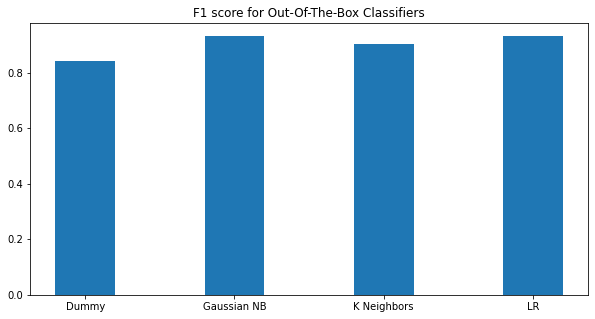

Dummy : 84.15300546448087%
Gaussian NB : 93.08176100628931%
K Neighbors : 90.24390243902438%
LR : 93.16770186335404%


In [113]:
results_f1 = {'Dummy':dummyclf_f1_score, 'Gaussian NB': gaussianNBclf_f1_score,
                    'K Neighbors': neighborsclf_f1_score, 'LR':logisticRegressorclf_f1_score}

plt.figure(figsize=(10, 5))
plt.bar(list(results_f1.keys()), list(results_f1.values()), width = 0.4)
plt.title("F1 score for Out-Of-The-Box Classifiers")
plt.show()

for k in results_f1.keys():
  print(f"{k} : {results_f1[k]*100}%")

Παρατηρούμε ότι την καλύτερη απόδοση την έχει ο LR, με ποσοστό επιτυχίας 93.1%. Η δεύτερη και τρίτη θέση εξακολουθεί να ανήκει στον GBL με 93% και τον KNN με 90.2%. Πάλι τα αποτελέσματα των τριών πρώτων ταξινομητών είναι αρκετά κοντά μεταξύ τους και είναι αντικείμενα της στοχαστικότητας της διαδικασίας εκπαίδευσης.
Στην τελευταία θέση, με σημαντική διαφορά, βρίσκεται φυσικά ο Dummy, αυτή τη φορά έχοντας 84% επιτυχία[link text](https://).

### Αποτελέσματα 10 fold cross-validation

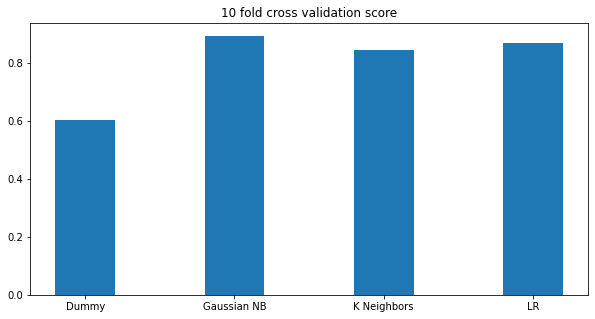

Dummy : 60.416666666666664%
Gaussian NB : 89.38333333333335%
K Neighbors : 84.48333333333335%
LR : 86.96666666666665%


In [114]:
results_cross_val_score = {'Dummy':dummyclf_cross_val_score, 'Gaussian NB': gaussianNB_cross_val_score,
                    'K Neighbors': neighborsclf_cross_val_score, 'LR':logisticRegressorclf_cross_val_score}

plt.figure(figsize=(10, 5))
plt.bar(list(results_cross_val_score.keys()), list(results_cross_val_score.values()), width = 0.4)
plt.title("10 fold cross validation score")
plt.show()

for k in results_f1.keys():
  print(f"{k} : {results_cross_val_score[k]*100}%")

Τα αποτελέσματα είναι πάλι παρόμοια με αυτά των 2 προηγούμενων μετρικών, αν και τώρα ο ταξινομητής KNN βρίσκεται με μία λιγότερο αμεληταία διαφορά στην 3η θέση.

### Συνοψη αποτελεσμάτων
| Ταξινομητής | F1 score default | Accuracy default |
| --- | --- | --- | 
|Dummy | 84% | 72% | 
| KNN | 90% | 85% | 
| GBN | 93% | 89% | 
| LR | 93% | 89% |


## Βελτιστοποίηση
Θα δοκιμάσουμε να βελτιστοποιήσουμε την απόδοση του εκάστοτε classifier μέσω προεπεξεργασίας δεδομένων, χρησιμοποιώντας Pipeline και gridsearch.

#### Επιλογή υπερπαραμέτρων
Για την επιλογή threshold για τον VarianceThreshold πρέπει πρώτα να βρούμεμε την διασπορά των μεταβλητών

In [115]:
train_variance = X_train.var(axis=0)
print(np.max(train_variance))

0.40428740331557866


Έτσι επιλέγουμε τις ακόλουθες τιμές για τις υπερπαραμέτρους

In [204]:
# Έχουμε 32 attributes, άρα μέχρι 32 n_components
n_components = [10, 15, 20, 25, 30, 31] #default = 31 στην περίπτωσή μας

# Για τον Dummy
strategy = ["most_frequent", "prior", "stratified", "uniform"]  #default = prior, η παράμετρος "strategy" του Dummy clf
# Για τον KNN
k = [1, 3, 5, 7, 9, 11] # η υπερπαράμετρος "n_neighbors" του ταξινομητή KNN, default = 5
# Για τον GNB
smoothing = [10**(-9), 10**(-5), 10**(-3), 10**(-1), 1, 2]# η υπερπαράμετρος "var_smoothing" του GBN, που έχει default τιμή 1e-9
# Για τον LR
c = [0.6, 0.9, 1, 1.1, 1.3, 1.6] # η υπερπαράμετρος "C" του LR, που έχει default τιμή 1

In [180]:
def GridSearch(clf, score):
  # clf = {"KNN", "GNB", "LR", "Dummy"}
  # score = {'f1_macro', 'accuracy'} 
  
  selector = VarianceThreshold()
  scaler = StandardScaler()
  ros = RandomOverSampler()
  pca = PCA()

  if clf == "Dummy":
    clf = DummyClassifier() 
    pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('Dummy', clf)], memory = 'tmp')
    estimator = GridSearchCV(pipe, dict(pca__n_components=n_components, Dummy__strategy=strategy), cv=10, scoring=score, n_jobs=-1)
  
  elif clf == "KNN":
    clf = KNeighborsClassifier(n_jobs=-1)
    pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('kNN', clf)], memory = 'tmp')
    estimator = GridSearchCV(pipe, dict(pca__n_components=n_components, kNN__n_neighbors=[1, 3, 5, 7, 9, 11]), cv=10, scoring=score, n_jobs=-1)
  
  elif clf == "GNB":
    clf = GaussianNB() 
    pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('GNB', clf)], memory = 'tmp')
    estimator = GridSearchCV(pipe, dict(pca__n_components=n_components, GNB__var_smoothing=smoothing), cv=10, scoring=score, n_jobs=-1)

  else:
    clf = LogisticRegression()
    pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('LR', clf)], memory = 'tmp')
    estimator = GridSearchCV(pipe, dict(pca__n_components=n_components, LR__C=c), cv=10, scoring=score, n_jobs=-1)

  #count time
  estimator.fit(X_train, y_train)
  return estimator

Εύρεση των καλύτερων υπερπαραμέτρων, για κάθε έναν από τους ταξινομητές, για κάθε μία από τις μετρικές.

In [184]:
#για τον dummy
dummy_f1 = GridSearch('Dummy', "f1_macro")
dummy_acc = GridSearch('Dummy', "accuracy")

Dummy_f1_score = metrics.f1_score(y_test, dummy_f1.predict(X_test))
Dummy_accuracy = metrics.accuracy_score(y_test, dummy_acc.predict(X_test))

print("f1:", dummy_f1.best_params_)
print("Acc:", dummy_acc.best_params_)

f1: {'Dummy__strategy': 'stratified', 'pca__n_components': 20}
Acc: {'Dummy__strategy': 'stratified', 'pca__n_components': 25}


In [170]:
#για τον ΚΝΝ
KNN_f1 = GridSearch('KNN', "f1_macro")
KNN_acc = GridSearch('KNN', "accuracy")

KNN_f1_score = metrics.f1_score(y_test, KNN_f1.predict(X_test))
KNN_accuracy = metrics.accuracy_score(y_test, KNN_acc.predict(X_test))

print("f1:", KNN_f1.best_params_)
print("Acc:", KNN_acc.best_params_)

f1: {'kNN__n_neighbors': 1, 'pca__n_components': 10}
Acc: {'kNN__n_neighbors': 1, 'pca__n_components': 10}


In [205]:
#για τον GBN
GBN_f1 = GridSearch('GNB', "f1_macro")
GBN_acc = GridSearch('GNB', "accuracy")

GBN_f1_score = metrics.f1_score(y_test, GBN_f1.predict(X_test))
GBN_accuracy = metrics.accuracy_score(y_test, GBN_acc.predict(X_test))

print("f1:", GBN_f1.best_params_)
print("Acc:", GBN_acc.best_params_)

f1: {'GNB__var_smoothing': 0.001, 'pca__n_components': 30}
Acc: {'GNB__var_smoothing': 0.001, 'pca__n_components': 30}


In [172]:
#για τον LR
LR_f1 = GridSearch('LR', "f1_macro")
LR_acc = GridSearch('LR', "accuracy")

LR_f1_score = metrics.f1_score(y_test, LR_f1.predict(X_test))
LR_accuracy = metrics.accuracy_score(y_test, LR_acc.predict(X_test))

print("f1:", LR_f1.best_params_)
print("Acc:", LR_acc.best_params_)

f1: {'LR__C': 1.3, 'pca__n_components': 31}
Acc: {'LR__C': 1.3, 'pca__n_components': 31}


## Bar plot σύγκρισης των εκτιμητών

#### 1) Dummy Classifier

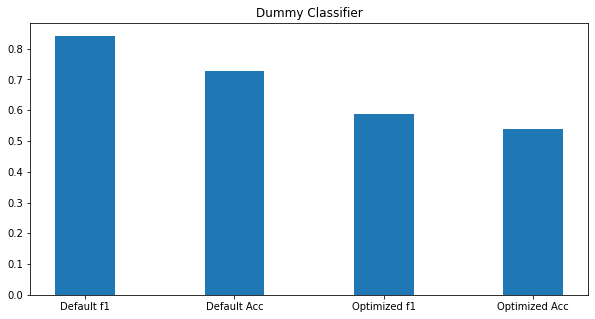

Default f1 : 84.15300546448087%
Default Acc : 72.64150943396226%
Optimized f1 : 58.91472868217055%
Optimized Acc : 53.77358490566038%


In [182]:
Dummy_results = {'Default f1':dummyclf_f1_score, 'Default Acc': dummyclf_accuracy,
                    'Optimized f1': Dummy_f1_score, 'Optimized Acc':Dummy_accuracy}

plt.figure(figsize=(10, 5))
plt.bar(list(Dummy_results.keys()), list(Dummy_results.values()), width = 0.4)
plt.title("Dummy Classifier")
plt.show()

for k in Dummy_results.keys():
  print(f"{k} : {Dummy_results[k]*100}%")


#### 2) KNN Classifier

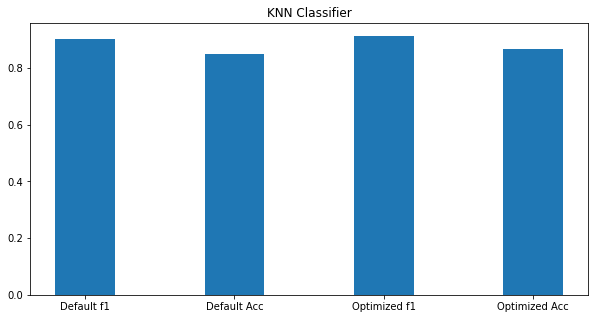

Default f1 : 90.24390243902438%
Default Acc : 84.90566037735849%
Optimized f1 : 91.25%
Optimized Acc : 86.79245283018868%


In [174]:
KNN_results = {'Default f1':neighborsclf_f1_score, 'Default Acc': neighborsclf_accuracy,
                    'Optimized f1': KNN_f1_score, 'Optimized Acc':KNN_accuracy}

plt.figure(figsize=(10, 5))
plt.bar(list(KNN_results.keys()), list(KNN_results.values()), width = 0.4)
plt.title("KNN Classifier")
plt.show()

for k in KNN_results.keys():
  print(f"{k} : {KNN_results[k]*100}%")

#### 3) GNB Classifier

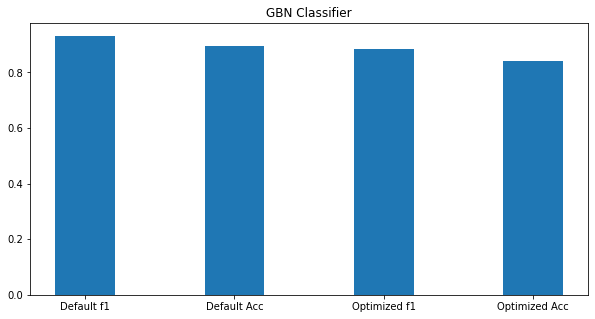

Default f1 : 93.08176100628931%
Default Acc : 89.62264150943396%
Optimized f1 : 88.27586206896552%
Optimized Acc : 83.9622641509434%


In [206]:
GBN_results = {'Default f1':gaussianNBclf_f1_score, 'Default Acc': gaussianNBclf_accuracy,
                    'Optimized f1': GBN_f1_score, 'Optimized Acc':GBN_accuracy}

plt.figure(figsize=(10, 5))
plt.bar(list(GBN_results.keys()), list(GBN_results.values()), width = 0.4)
plt.title("GBN Classifier")
plt.show()

for k in GBN_results.keys():
  print(f"{k} : {GBN_results[k]*100}%")

#### 4) LR Classifier

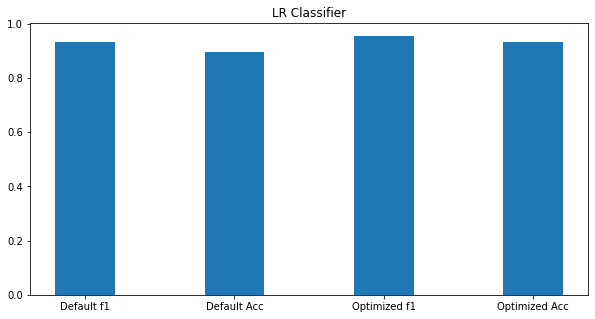

Default f1 : 93.16770186335404%
Default Acc : 89.62264150943396%
Optimized f1 : 95.54140127388536%
Optimized Acc : 93.39622641509435%


In [176]:
LR_results = {'Default f1':logisticRegressorclf_f1_score, 'Default Acc': logisticRegressorclf_accuracy,
                    'Optimized f1': LR_f1_score, 'Optimized Acc':LR_accuracy}

plt.figure(figsize=(10, 5))
plt.bar(list(LR_results.keys()), list(LR_results.values()), width = 0.4)
plt.title("LR Classifier")
plt.show()

for k in LR_results.keys():
  print(f"{k} : {LR_results[k]*100}%")

## Σχολιασμός Αποτελεσμάτων

| Ταξινομητής | F1 score default | Accuracy default | F1 score optimized | Accuracy Optimized | Parameters Used |
| --- | --- | --- | --- | --- | --- |
|Dummy | 84% | 72% | 58% | 53% |stratified, components=20 |
| KNN | 90% | 85% | 91.25% | 87% | k=1, components=10 |
| GBN | 93% | 89% | 88% | 84% | smoothing=0.001, comp = 30 | 
| LR | 93% | 89% | 95% | 93% |  C=1.3, components=31|


### Παρατηρήσεις:
Για τον <b> Dummy Classifier </b> είδαμε μία μεγάλη πτώση στις εκτιμήσεις του, παρόλο που χρησιμοποιήσαμε Grid Search. Αυτό ίσως οφείλεται στο ότι ο Dummy Classifier ταξινομεί επιλέγοντας κάθε φορά την πιο δημοφιλή κλάση (στρατηγική prior). Αρχικά όμως είχαμε μη ισορροπημένες κλάσεις, γεγονός που έδινε στον Dummy ιδιαίτερα αυξημένο accuracy, αφού όλες του οι προβλέψεις ήταν 1 (good), κάτι που ίσχυε τουλάχιστον στο 70% των περιπτώσεων. Με το Grid Search ωστόσο, φροντίσαμε να εξισορροπήσουμε το dataset, με αποτέλεσμα η απόδοση του dummy να πέσει λίγο πάνω από το 50%. 

Για τους <b> ΚΝΝ Classifier </b> και <b> LR Classifier </b>, είδαμε βελτίωση των τελικών αποτελεσμάτων της τάξης 2-3%. Αυτό συνέβη επιλέγοντας καλύτερες υπερπαραμέτρους με την βοήθεια του grid search, όπως για παράδειγμα 1 κοντινότερο γείτονα αντί για 5 που ήταν η default τιμή. Ο δε Logistic Regration ήταν εξ αρχής (out of the box) αλλά και εν τέλει (χρησιμοποιώντας βέλτιστες υπερπαραμέτρους) η καλύτερη επιλογή για το πρόβλημα μας. Το τελικό ποσοστό accuracy έφτασε το 95% και η μετρική f1 score το 93%.

Ο <b> GBΝ Classifier </b> ήταν ο μόνος εκτιμητής του οποίου η απόδοση έπεσε συγκριτικά με την out of the box. Η πτώση δεν ήταν ιδιαίτερα μεγάλη (της τάξης του 4%) ωστόσο εγγείρει προβληματισμό. Δεδομένου ότι όλες οι παράμετροι που δώθηκαν στο Greed Search περιλάμβαν τις default τιμές του out of the box Gaussian BN classifier, η πιο λογική εξήγηση κρύβεται πάλι στην εξισορρόπηση των κλάσεων που έγινε. Σε αυτό το σημείο αξίζει κανείς να αναφέρει ότι ο εν λόγω εκτιμητής είχε ακρετές μεταπτώσεις στα αποτελέσματά του, ανάλογα με το αρχικό seed που δινόταν στην αρχή του notebook. Στην συγκεκριμένη φάση χρησιμοποιήσαμε seed(1), κάτι που οδήγησε σε 93% αρχικό accuracy, ωστόσο υπήρχαν άλλες φορές, που ο ίδιος εκτιμητής Out of the box, έδωσε γύρω στο 88% accuracy, ανάλογα το split σε test και train set. Τέλος αξίζει να σημειωθεί ότι ο GBN υποθέτει πως ο covariance matrix είναι διαγώνιος, ενώ στην πραγματικότητα μπορεί να μην είναι. H επανάληψη κάποιων instances της κλάσης bad(0) ώστε να επέλθει εξισορρόπηση κλάσεων, μπορεί να κατέστησε την υπόθεση αυτή όχι τόσο κοντά στην πραγματικότητα, μειώνοντας την αποτελεσματικότητα του αλγορίθμου.

### Πίνακες σύγχυσης
Τα βέλτιστα αποτελέσματα του κάθε εκτιμητή, φαίνεται ότι επιτυχγάνονται με την χρήση των ίδιων υπερπαραμέτρων, ανεξαρτήτως από το ποια μετρική κοιτάμε. Ως εκ τούτου, στους ακόλουθους πίνακες σύγχυσης θα χρησιμοποιήσουμε τους _f1 classifiers, που ταυτίζονται άλλωστε με αυτούς της μετρικής accuracy.

#### 1) ΚΝΝ

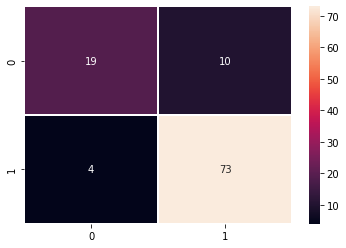

In [210]:
cm = sklearn.metrics.confusion_matrix(y_test, KNN_f1.predict(X_test))
sns.heatmap(cm, annot=True,  linewidths=.5)

#### 2) BGN 

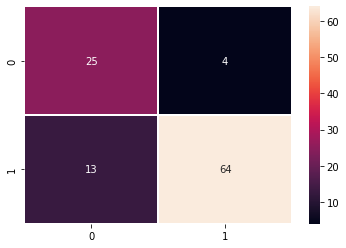

In [213]:
cm = sklearn.metrics.confusion_matrix(y_test, GBN_f1.predict(X_test))
sns.heatmap(cm, annot=True,  linewidths=.5)

#### 3) LR

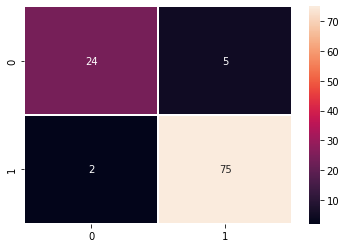

In [214]:
cm = sklearn.metrics.confusion_matrix(y_test, LR_f1.predict(X_test))
sns.heatmap(cm, annot=True,  linewidths=.5)

### Σχολιασμός Πινάκων Σύγχυσης
Μετά την βελτιστοποίηση, αποδείχθηκε ότι ο καλύτερος ταξινομητής είναι ο logistic Regression, κάτι που είναι εμφανές και στους πίνακες σύγχυσης. Στον πίνακα του Logistic Regression τα κελιά (0,0) και (1,1) έχουν αρκετά ανοιχτό χρώμα (που συνεπάγεται με πολλές ορθές απαντήσεις, ενώ τα κελιά σφαλμάτων (0,1) και (1,0) είναι πολύ πιο σκούρα, γεγονός που δείχνει μικρό αριθμό λανθασμένων εκτιμήσεων. Συνολικά οι εσφαλμένες εκτιμήσεις του LR ήταν μόλις 7, έναντι 14 και 17 των ΚΝΝ και GNB αντίστοιχα.

## Τελικά Αποτελέσματα
Όπως έχει ήση προαναφερθεί, έπειτα από τις βελτιστοποιήσεις, την καλύτερη αποτελεσματικότητα έχει ο αλγόριθμος Logistic Regression, που φτάνει ένα ποσοστό 95%. Αυτός θα ήταν και ο αλγόριθμος που θα προτιμούσαμε για το πρόβλημα αυτό, αν και οι υπόλοιποι αλγόριθμοι δεν υστερούν ιδιαίτερα πολυ σε αποτελεσματικότητα. Όσον αφορά στους χρόνους που χρειάστηκαν για την εκπαίδευση των εκτιμητών αλλά και το test αυτών, ήταν ιδιαίτερα κοντινοί μεταξύ τους και ανέρχονταν σε μόλις κλάσματα του δευτερολέπτου. Αυτό φυσικά οφείλεται στο ότι το dataset μας είναι ιδιαίτερα μικρό, με μόλις 351 entries συνολικά. Αυτό συνεπάγεται με 245 instances για εκπαίδευση και 106 και τεστ. Οι αριθμοί αυτοί είναι προφανώς πολύ μικροί για να διαπιστωθούν διαφορές μεταξύ των ταξινομητών ως προς τον χρόνο εκπαίδευσης. Αν τα δεδομένα ήταν σημαντικά περισσότερα (δεκάδες χιλιάδες πιθανώς), τότε θα έιχε νόημα να επιλέξουμε ταξινομητή βασιζόμενοι και στην ταχύτητά του, αλλά για τόσο μικρό dataset, η επιλογή του πιο accurate ταξινομητή είναι μονόδρομος.